In [1]:
import numpy as np
import pylab as pl

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def SUConverter(V_in, V_out, P_load,P_in = None): 
    # step-up converter 
    # reference LTC3526L/LTC3526LB
    # V_out should be 3.3 volt...

    if P_in is None:
        I_load = P_load / V_out
        I_log = np.log10(I_load)
        eflevel=(min(V_in,V_out)-1.2)/1.8*0.13+0.82
        efficiency=sigmoid((I_log+4.9)*2)*sigmoid((-0.2-I_log)*6)*eflevel
        P_in = P_load / efficiency
        P_in = max(P_in,5e-5)
        if V_in > V_out:
            P_in = max(P_in,I_load * V_in) #a guess ... should be checked !!!
        if V_in <0.8: P_in,P_load = 1e-6,0
    else: #If P_in given
        if V_in<=0:
            return 0,0
        I_in = P_in / V_in   
        I_log = np.log10(I_in)-(3.0-V_in)/4
        eflevel=(min(V_in,V_out)-1.2)/1.8*0.13+0.82
        efficiency=sigmoid((I_log+4.65)*2.4)*sigmoid((-0.02-I_log)*5.0)*eflevel
        P_load = P_in*efficiency
        if V_in > V_out:
            P_load = min(P_load,I_in * V_out)
        if V_in <0.8: P_in,P_load = 1e-6,0
        
    return P_in,P_load
    

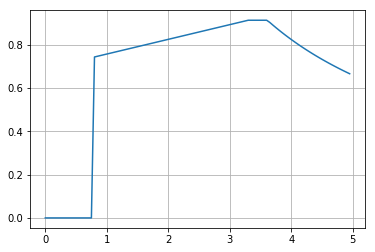

In [5]:
v=np.arange(0,5,.05)
Pi=[]
Po=[]
for vee in v:
    pi,po=SUConverter(vee, 3.3, 1e-3)
    Pi.append(pi)
    Po.append(po)
#pl.plot(v,Pi)
pl.plot(v,np.array(Po)/np.array(Pi))
pl.grid()
pl.show()

In [ ]:
V_in = [1.2,1.8,2.4,3]
V_out = 3.3
I_log_load = np.arange(-5,-.5,.01)
I_load = np.power(10,I_log_load)
P_load = V_out*I_load

P_in=[[] for v in V_in]
for i,v in enumerate(V_in):
    for p in P_load:
        Pi,Po=SUConverter(v, V_out, 0, P_in = p)
        P_in[i].append(Po)
    #pl.semilogx(np.array(P_in[i])/V_out,P_in[i]/P_load)
    pl.semilogx(np.array(P_in[i])/V_out,P_in[i]/P_load)

pl.show()

for i in range(len(V_in)): 
    pl.loglog(np.array(P_in[i])/V_out,P_load-P_in[i])
pl.show()
for i in range(len(V_in)): 
    pl.loglog(P_load,P_in[i])
pl.show()

In [ ]:
V_in = [1.2,1.8,2.4,3]
V_out = 3.3
I_log_load = np.arange(-5,-.5,.01)
I_load = np.power(10,I_log_load)
P_load = V_out*I_load

P_in=[[] for v in V_in]
for i,v in enumerate(V_in):
    for p in P_load:
        Pi,Po=SUConverter(v, V_out, p)
        P_in[i].append(Pi)
    #pl.semilogx(np.array(P_in[i])/V_in[i],P_load/P_in[i])
    pl.plot(np.log10(np.array(P_in[i])/V_in[i]),P_load/P_in[i])
pl.show()

for i in range(len(V_in)): 
    pl.loglog(np.array(P_in[i])/V_in[i],P_in[i]-P_load)
pl.show()
for i in range(len(V_in)): 
    pl.loglog(P_load,P_in[i])
pl.show()

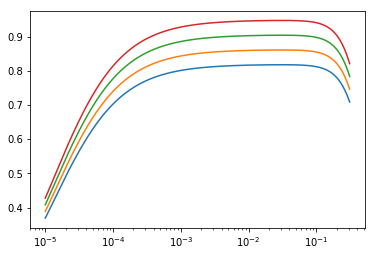

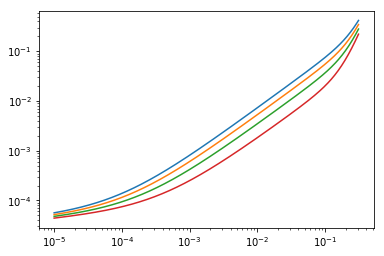

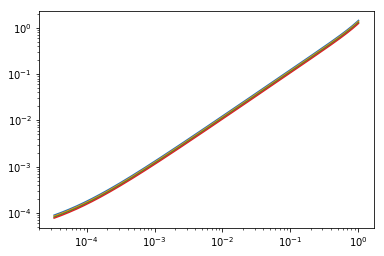

In [6]:
V_in = [1.2,1.8,2.4,3]
V_out = 3.3
I_log_load = np.arange(-5,-.5,.01)
I_load = np.power(10,I_log_load)
P_load = V_out*I_load

P_in=[[] for v in V_in]
for i,v in enumerate(V_in):
    for p in P_load:
        Pi,Po=SUConverter(v, V_out, p)
        P_in[i].append(Pi)
    pl.semilogx(P_load/V_out,P_load/P_in[i])

pl.show()

for i in range(len(V_in)): 
    pl.loglog(P_load/V_out,P_in[i]-P_load)
pl.show()
for i in range(len(V_in)): 
    pl.loglog(P_load,P_in[i])
pl.show()



In [ ]:
V_in = np.arange(0.5,3,.05)
I_nl = 50/V_in
pl.plot(V_in, I_nl)
pl.grid()
pl.show()


In [ ]:
volt= np.array([3.0, 2.4, 1.8, 1.2])
eff= [0.95, 0.9, 0.87, 0.82]

v=np.arange(0.7,4,.1)

EF=(v-1.2)/1.8*0.13+0.82

pl.plot(volt,eff,"*")
pl.plot(v,EF)
pl.show()

In [ ]:


v_in = [1.1,2.2,3.3]
v_Out = 3.3
I_log_load = np.arange(-5,-0.5,.01)
I_load = np.power(10,I_log_load)
I_llog = np.log10(I_load)

P_load = v_Out*I_load 

efficiency=sigmoid((I_llog+4.9)*2)*sigmoid((-0.2-I_llog)*6)*0.9
P_loss=P_load*(1-efficiency)

pl.semilogx(I_load,efficiency)
pl.grid()
pl.show()
pl.loglog(I_load,P_loss)
pl.grid()
pl.show()

In [ ]:

v_in = 2.4 #[1.1,2.2,3.3]
v_Out = 3.3
I_log_load = np.arange(-5,-0.5,.01)
I_load = np.power(10,I_log_load)
I_llog = np.log10(I_load)

P_load = v_Out*I_load 

efficiency=sigmoid((I_llog+4.9)*2)*sigmoid((-0.2-I_llog)*6)*0.5
P_in=P_load/efficiency
P_loss=P_in-P_load

I_log_in = np.arange(-5,-0.4,.01)
I_in = np.power(10,I_log_in)
I_llin = np.log10(I_in)
P_in = v_in*I_in
effin=sigmoid((I_llin+4.65)*2.4)*sigmoid((-0.02-I_llin)*5.0)*0.5

pl.semilogx(I_load,efficiency)
pl.semilogx(I_in*effin,effin)
pl.grid()
pl.show()
pl.loglog(I_load+P_loss/2.4,P_loss)
pl.grid()
pl.show()